<h1>PAD Lab Experiment 5</h1>

<h2>Roshan Srivastava <br> J047<br>MBA Tech. EXTC SEM 7</h2>

<h3>Aim: To apply Anomaly Detection on the provided credit card data</h3>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns


In [3]:
data = pd.read_csv("creditcard.csv")
data.head() #having a look of the data we're dealing with
# if class is 0, normal transaction, 1 is anomaly
# amount is amount of transaction

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
data.shape #taking a look at the shape of the dataset

(284807, 31)

In [5]:
reducedData = data.sample(frac=0.2,random_state=1) #sampling the data
reducedData.shape

(56961, 31)

Text(0.5, 1.0, 'Credit Card Anomalies (0: Normal, 1: Anomaly)')

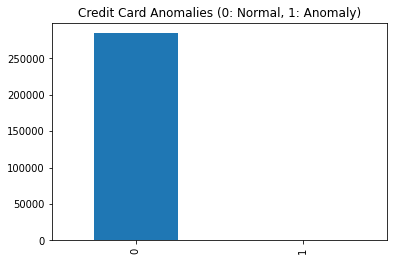

In [6]:
num_classes = pd.value_counts(data['Class'],sort=True)
num_classes.plot(kind='bar') #plotting normal and anomalies
plt.title('Credit Card Anomalies (0: Normal, 1: Anomaly)')

In [8]:
fraud =  reducedData[reducedData['Class']==1]
normal =  reducedData[reducedData['Class']==0]

In [11]:
fraud.shape, normal.shape

((87, 31), (56874, 31))

Text(0.5, 0, 'Time (from first transaction)')

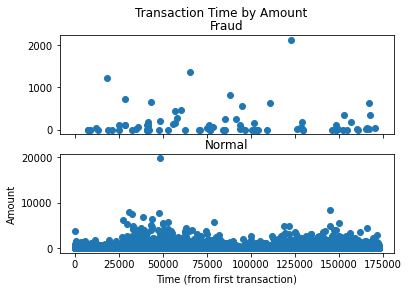

In [19]:
fg,(plot1,plot2) = plt.subplots(2,1,sharex=True)
fg.suptitle("Transaction Time by Amount") #plotting shown graphs for both normal and fraud transcations

plot1.scatter(fraud.Time,fraud.Amount)
plot1.set_title("Fraud")
plt.ylabel("Amount")

plot2.scatter(normal.Time,normal.Amount)
plot2.set_title("Normal")
plt.ylabel("Amount")

plt.xlabel("Time (from first transaction)")

Text(0.5, 0, 'Amount')

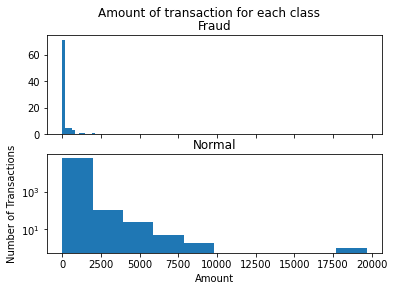

In [25]:
fg,(plot1,plot2) = plt.subplots(2,1,sharex=True)
fg.suptitle("Amount of transaction for each class") #plotting shown graphs for both normal and fraud transcations

plot1.hist(fraud.Amount,bins=10)
plot1.set_title("Fraud")

plot2.hist(normal.Amount,bins=10)
plot2.set_title("Normal")
plt.yscale('log') #used to spread the data across the x axis

plt.ylabel("Number of Transactions")
plt.xlabel("Amount")


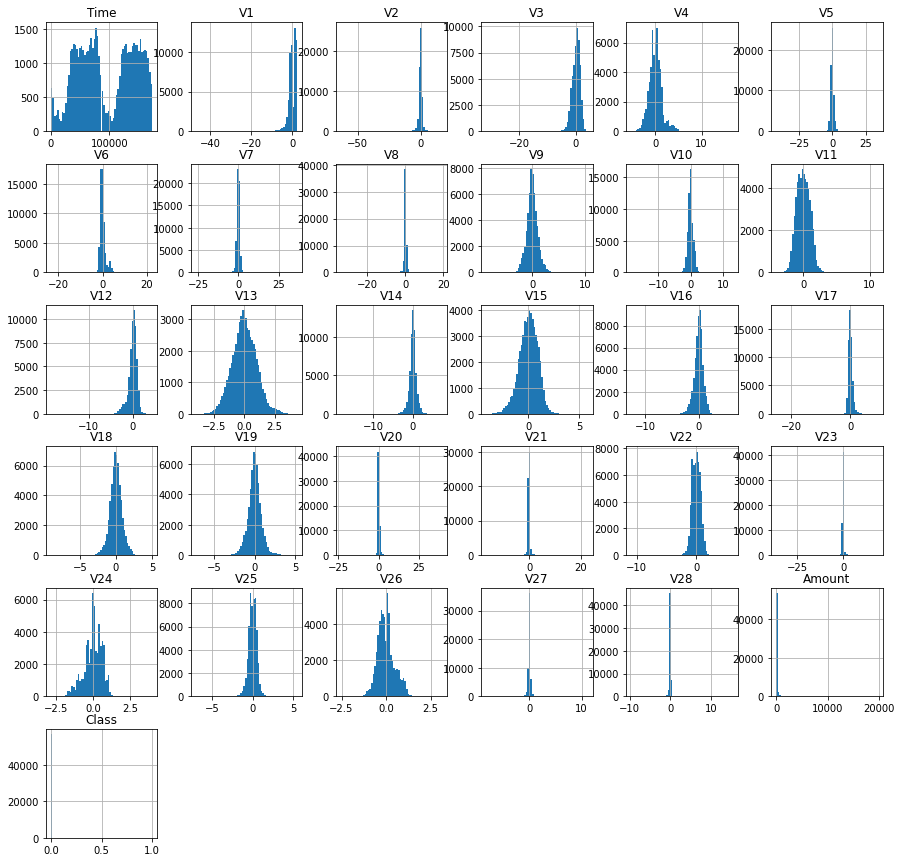

In [27]:
reducedData.hist(figsize=(15,15),bins=64);

In [31]:
cols = reducedData.columns.to_list()
target = cols[-1]
features = cols[:-1]
x_train,x_test,y_train,y_test = train_test_split(reducedData[features],reducedData[target],test_size=0.2,random_state=1) 

In [34]:
fraud_fraction = len(fraud)/len(reducedData)
fraud_fraction

0.0015273608258281983

In [36]:
model = LocalOutlierFactor(contamination=fraud_fraction)
y_train_pred = model.fit_predict(x_train)
y_train_pred[y_train_pred==-1]=1
y_train_pred[y_train_pred==1]=0

y_test_pred = model.fit_predict(x_test)
y_test_pred[y_test_pred==-1]=1
y_test_pred[y_test_pred==1]=0

Text(0.5, 1.0, 'Confusion Matrix')

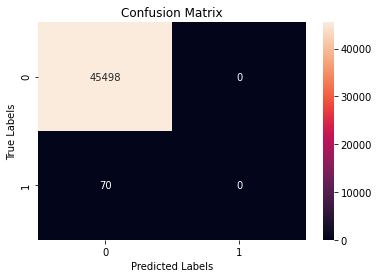

In [43]:
conf_mat_train = confusion_matrix(y_train,y_train_pred)
ax = plt.subplot()
sns.heatmap(conf_mat_train,annot=True,fmt='g')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix')

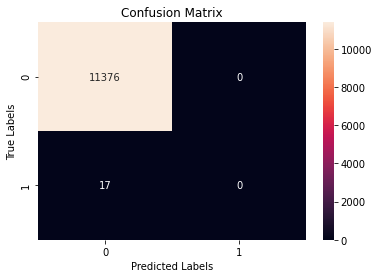

In [42]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)
ax = plt.subplot()
sns.heatmap(conf_mat_test,annot=True,fmt='g')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")

<h1>Conclusion</h1>
<ol>
<li>
For the given dataset, outliers are detected using Local Out Factor algorithm. 
</li>
<li>
Out of 87 fraud cases, the model is able to predict only 20 samples correctly.
</li>
<li>
The reason is most of the outliers are not away from the main cluster.
</li>
</ol>